# install and import dependencies

In [1]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings;
warnings.simplefilter('ignore')

In [4]:
import pandas as pd
from prophet import Prophet

# preparing data

In [5]:
df = pd.read_csv("/Users/mitalijuvekar/Documents/dataset.csv")

In [6]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [7]:
df['Product'].unique()

array([2667437])

In [8]:
df['Store'].unique()

array(['QLD_CW_ST0203'], dtype=object)

In [9]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [10]:
#need to change Time Date
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['Date'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [11]:
print(df)

      Time Date  Product          Store        Value  Year Month Day  \
0       1012018  2667437  QLD_CW_ST0203  2926.000000  2018    01   1   
1       2012018  2667437  QLD_CW_ST0203  2687.531000  2018    01   2   
2       3012018  2667437  QLD_CW_ST0203  2793.000000  2018    01   3   
3       4012018  2667437  QLD_CW_ST0203  2394.000000  2018    01   4   
4       5012018  2667437  QLD_CW_ST0203  2660.000000  2018    01   5   
...         ...      ...            ...          ...   ...   ...  ..   
1075   12122020  2667437  QLD_CW_ST0203  3167.594500  2020    12  12   
1076   13122020  2667437  QLD_CW_ST0203  3167.594500  2020    12  13   
1077   14122020  2667437  QLD_CW_ST0203  3383.354511  2020    12  14   
1078   15122020  2667437  QLD_CW_ST0203  2714.591329  2020    12  15   
1079   16122020  2667437  QLD_CW_ST0203  2585.035107  2020    12  16   

           Date  
0    2018-01-01  
1    2018-01-02  
2    2018-01-03  
3    2018-01-04  
4    2018-01-05  
...         ...  
1075 2020

In [12]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis = 1, inplace = True)
df.columns = ['y', 'ds']

In [13]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# training model

In [14]:
model = Prophet(interval_width = 0.95, daily_seasonality = True)
model.fit(df)

21:24:35 - cmdstanpy - INFO - Chain [1] start processing
21:24:35 - cmdstanpy - INFO - Chain [1] done processing


# forecasting

In [15]:
future_dates = model.make_future_dataframe(periods=100, freq='D')
forecast = model.predict(future_dates)

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.594103,758.131581,3915.625453,3042.594103,3042.594103,-638.437544,-638.437544,-638.437544,472.141955,...,16.616741,16.616741,16.616741,-1127.196240,-1127.196240,-1127.196240,0.0,0.0,0.0,2404.156560
1,2018-01-02,3043.322464,654.728697,4006.593000,3043.322464,3043.322464,-648.635765,-648.635765,-648.635765,472.141955,...,-11.282714,-11.282714,-11.282714,-1109.495007,-1109.495007,-1109.495007,0.0,0.0,0.0,2394.686699
2,2018-01-03,3044.050824,914.789014,3963.827390,3044.050824,3044.050824,-622.870532,-622.870532,-622.870532,472.141955,...,-4.407308,-4.407308,-4.407308,-1090.605179,-1090.605179,-1090.605179,0.0,0.0,0.0,2421.180292
3,2018-01-04,3044.779185,844.319141,4053.873676,3044.779185,3044.779185,-575.980886,-575.980886,-575.980886,472.141955,...,22.479695,22.479695,22.479695,-1070.602537,-1070.602537,-1070.602537,0.0,0.0,0.0,2468.798298
4,2018-01-05,3045.507545,828.381296,4098.473351,3045.507545,3045.507545,-612.050581,-612.050581,-612.050581,472.141955,...,-34.576880,-34.576880,-34.576880,-1049.615656,-1049.615656,-1049.615656,0.0,0.0,0.0,2433.456964


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4233.955492,2135.984375,5377.396575,4230.406534,4237.220717,-511.103379,-511.103379,-511.103379,472.141955,...,16.616741,16.616741,16.616741,-999.862075,-999.862075,-999.862075,0.0,0.0,0.0,3722.852114
1176,2021-03-23,4235.029099,2294.125235,5315.649846,4231.426413,4238.334922,-528.550074,-528.550074,-528.550074,472.141955,...,-11.282714,-11.282714,-11.282714,-989.409315,-989.409315,-989.409315,0.0,0.0,0.0,3706.479026
1177,2021-03-24,4236.102707,2107.073932,5270.087348,4232.462280,4239.478720,-513.999140,-513.999140,-513.999140,472.141955,...,-4.407308,-4.407308,-4.407308,-981.733787,-981.733787,-981.733787,0.0,0.0,0.0,3722.103567
1178,2021-03-25,4237.176314,2271.659787,5294.677644,4233.475404,4240.622518,-482.796937,-482.796937,-482.796937,472.141955,...,22.479695,22.479695,22.479695,-977.418587,-977.418587,-977.418587,0.0,0.0,0.0,3754.379377
1179,2021-03-26,4238.249921,2076.195858,5315.499510,4234.453994,4241.766315,-539.396807,-539.396807,-539.396807,472.141955,...,-34.576880,-34.576880,-34.576880,-976.961882,-976.961882,-976.961882,0.0,0.0,0.0,3698.853114


In [18]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2404.156560
1,2018-01-02,2394.686699
2,2018-01-03,2421.180292
3,2018-01-04,2468.798298
4,2018-01-05,2433.456964
...,...,...
1175,2021-03-22,3722.852114
1176,2021-03-23,3706.479026
1177,2021-03-24,3722.103567
1178,2021-03-25,3754.379377


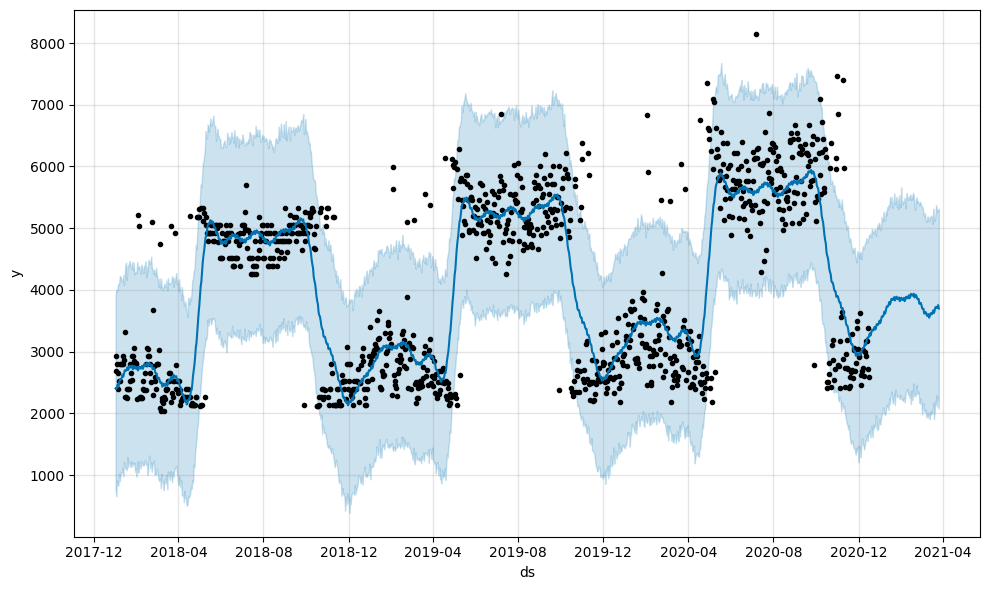

In [19]:
plot1 = model.plot(forecast)

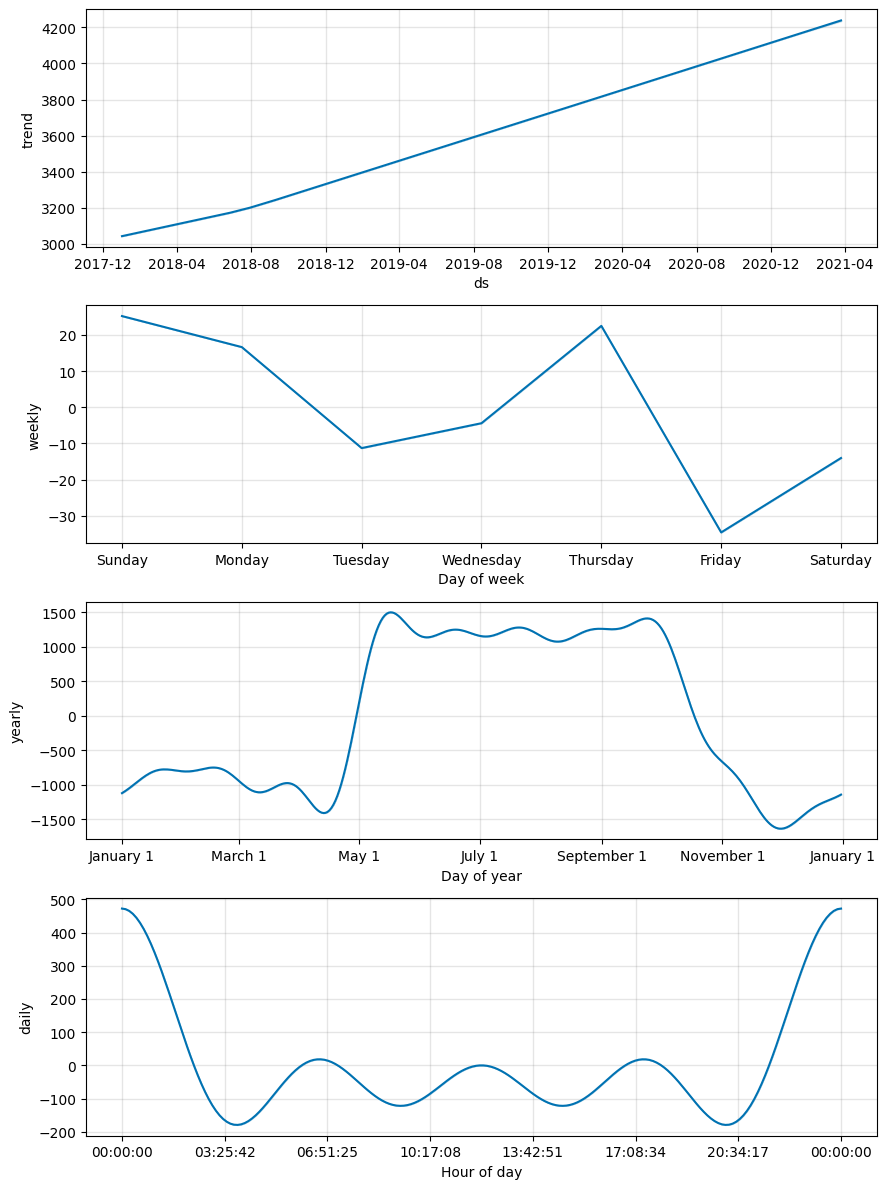

In [20]:
# decomposing the above plot
plot2 = model.plot_components(forecast)